# Task 1. Exploratory Data Analysis (EDA)

## Background Information

This task is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights you can gather from the tasks below will be genuine.

The relevant dataset is linked below for you. 

## Tasks

1. Load the transaction dataset below into an analysis tool of your choice (Excel, R, SAS, Tableau, or similar)


2. Start by doing some basic checks – are there any data issues? Does the data need to be cleaned?


3. Gather some interesting overall insights about the data. For example -- what is the average transaction amount? How many transactions do customers make each month, on average?


4. Segment the dataset by transaction date and time. Visualise transaction volume and spending over the course of an average day or week. Consider the effect of any outliers that may distort your analysis.


5. For a challenge – what insights can you draw from the location information provided in the dataset?


6. Put together 2-3 slides summarising your most interesting findings to ANZ management.

In [1]:
import os
from datetime import *

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# import matplotlib.gridspec as gridspec # Alignments

print(f"Matplotlib Version : {mpl.__version__}")
print(f"Seaborn Version : {sns.__version__}")

Matplotlib Version : 3.3.2
Seaborn Version : 0.11.0


In [2]:
%ls

 Volume in drive D is New Volume
 Volume Serial Number is AA35-4C60

 Directory of D:\1. Data365\1. Data Analyst Portfolio\4. DataANZ

03/10/2021  10:51 PM    <DIR>          .
03/10/2021  10:51 PM    <DIR>          ..
03/10/2021  03:49 PM    <DIR>          .ipynb_checkpoints
03/10/2021  10:51 PM           509,975 1_DataANZ_Virtual_Internship_Program.ipynb
03/10/2021  12:59 PM           330,622 1_DataANZ_Virtual_Internship_Program-Copy1.ipynb
03/10/2021  03:49 PM           464,612 1_DataANZ_Virtual_Internship_Program-Copy2.ipynb
01/10/2021  03:25 PM         1,782,724 ANZ synthesised transaction dataset.xlsx
01/10/2021  09:46 PM            17,348 DataANZ.docx
               5 File(s)      3,105,281 bytes
               3 Dir(s)  125,640,523,776 bytes free


In [3]:
pd.options.display.max_columns = 40
pd.options.display.max_rows = 1000
# pd.set_option('display.max.rows', 100)

In [4]:
print(pd.get_option('display.max.columns'))
print(pd.get_option('display.max.rows'))

40
1000


## 1. Load the dataset

**card_present_flag** - A card-not-present (CNP) transaction occurs when neither the cardholder nor the credit card is physically present at the time of the transaction. It’s most common for orders that happen remotely — over the phone, internet or mail.

**bpay_biller_code** - The biller code is a unique number required to process a BPAY® transaction and you can find it on your statement.


In [5]:
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')
print(df.shape) # 12,043 rows and 23 columns
df.head()

(12043, 23)


,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


## 2. Basic checks

In [6]:
# Check types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [7]:
# Check duplicates
df.duplicated().sum()

0

Many missing values in **bpay_biller_code** and **merchant_code**, and I might simply be able to drop the columns.

The following features have the same amount of missing data:
* card_present_flag
* merchant_id
* merchant_suburb
* merchant_state
* merchant_long_lat

It might be reasonable to think that if a row doesn't have a value in any of those columns, the row is unlikely to have values in the other columns as well.

In [8]:
# Check missing values
missing = df.isnull().sum()
missing = missing[missing >= 1]
per = round(missing/len(df)*100, 2)
pd.DataFrame({'Number of missing values':missing, 'Percentage (%)': per}).sort_values(by = 'Percentage (%)', ascending = False)

,Number of missing values,Percentage (%)
merchant_code,11160,92.67
bpay_biller_code,11158,92.65
card_present_flag,4326,35.92
merchant_id,4326,35.92
merchant_suburb,4326,35.92
merchant_state,4326,35.92
merchant_long_lat,4326,35.92


In [9]:
mis_val_cols = []

for col in df.columns:
    if df[col].isnull().sum() >= 1:
        mis_val_cols.append(col)

My inference seems right. The below code shows the rows that have missing values more than 3, and there are 4326 rows.

In [10]:
df.iloc[df[(df.isnull().sum(axis=1) >= 3)].index] # 4326 rows
# df[mis_val_cols].iloc[df[(df.isnull().sum(axis=1) >= 3)].index] # 4326 rows

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
5,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,1705.43,2018-08-01,M,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.0,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit
9,posted,NaN,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,NaN,Michael,466.58,2018-08-01,M,40,NaN,NaN,2018-08-01T06:00:00.000+0000,21.0,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,NaN,debit
10,posted,NaN,NaN,ACC-2171593283,AUD,146.94 -36.04,PAYMENT,NaN,NaN,Fernando,4348.50,2018-08-01,M,19,NaN,NaN,2018-08-01T06:00:00.000+0000,27.0,baff17b27b2643c48c84fca7129e9611,Australia,CUS-2317998716,NaN,debit
11,posted,NaN,NaN,ACC-2776252858,AUD,144.95 -37.76,PAYMENT,NaN,NaN,Kristin,1203.75,2018-08-01,F,43,NaN,NaN,2018-08-01T06:00:00.000+0000,29.0,78a1b6c3a5534d48828d8ed266ba9c2e,Australia,CUS-4123612273,NaN,debit
13,posted,NaN,NaN,ACC-588564840,AUD,151.27 -33.76,INTER BANK,NaN,NaN,Isaiah,4438.16,2018-08-01,M,23,NaN,NaN,2018-08-01T07:00:00.000+0000,25.0,eaafa602902b4f4194efb96a105dd7ab,Australia,CUS-1462656821,NaN,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12027,posted,NaN,NaN,ACC-2173390920,AUD,144.71 -37.58,PHONE BANK,NaN,NaN,Luis,13537.75,2018-10-31,M,27,NaN,NaN,2018-10-31T21:00:00.000+0000,67.0,b2c42c27bb24464cb5e3e0ffbf9b1977,Australia,CUS-3180318393,NaN,debit
12032,posted,NaN,NaN,ACC-1710017148,AUD,150.82 -34.01,PAYMENT,NaN,NaN,Michelle,20699.90,2018-10-31,F,19,NaN,NaN,2018-10-31T22:00:00.000+0000,33.0,96fe9c5dcda24b599e81b6f6d5bdcb66,Australia,CUS-883482547,NaN,debit
12035,posted,NaN,NaN,ACC-1973887809,AUD,115.78 -31.90,PAYMENT,NaN,NaN,Antonio,9349.51,2018-10-31,M,26,NaN,NaN,2018-10-31T23:00:00.000+0000,29.0,dda53e538c5b4d5aae2481be22e60440,Australia,CUS-1646621553,NaN,debit
12036,posted,NaN,NaN,ACC-1349834573,AUD,145.17 -37.84,PAYMENT,NaN,NaN,Matthew,18127.50,2018-10-31,M,39,NaN,NaN,2018-10-31T23:00:00.000+0000,32.0,df15d6f039554dcbb3ca02631ce22068,Australia,CUS-1790886359,NaN,debit


Date starts from 2018-08-01 to 2018-10-31.

In [11]:
# Statistical summary for date
df.describe(include = 'datetime', datetime_is_numeric=True)

,date
count,12043
mean,2018-09-15 21:27:39.951812864
min,2018-08-01 00:00:00
25%,2018-08-24 00:00:00
50%,2018-09-16 00:00:00
75%,2018-10-09 00:00:00
max,2018-10-31 00:00:00


In [12]:
# Statistical summary for categorical features
df.describe(include = 'object')

,status,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,first_name,gender,merchant_suburb,merchant_state,extraction,transaction_id,country,customer_id,merchant_long_lat,movement
count,12043,885,12043,12043,12043,12043,7717,12043,12043,7717,7717,12043,12043,12043,12043,7717,12043
unique,2,3,100,1,100,6,5725,80,2,1609,8,9442,12043,1,100,2703,2
top,authorized,0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,106e1272-44ab-4dcb-a438-dd98e0071e51,Michael,M,Melbourne,NSW,2018-09-03T11:00:00.000+0000,9e35ce296b014f7da33347a0f3217e4b,Australia,CUS-2487424745,151.21 -33.87,debit
freq,7717,883,578,12043,578,3934,14,746,6285,255,2169,10,1,12043,578,145,11160


In [13]:
# Number of unique values in categorical columns
df.select_dtypes(include = 'O').nunique().sort_values()

country                  1
currency                 1
status                   2
gender                   2
movement                 2
bpay_biller_code         3
txn_description          6
merchant_state           8
first_name              80
long_lat               100
customer_id            100
account                100
merchant_suburb       1609
merchant_long_lat     2703
merchant_id           5725
extraction            9442
transaction_id       12043
dtype: int64

In [14]:
# Statistical summary for numerical features
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [15]:
# Number of unique values in numerical/date columns
df.select_dtypes(exclude = 'O').nunique().sort_values()

merchant_code            1
card_present_flag        2
age                     33
date                    91
amount                4457
balance              12006
dtype: int64

## 3. Some interesting overall insights

Select columns that have unique values more than 1 and less than 25.

In [16]:
[col for col in df.select_dtypes(include = 'O').columns if (df[col].nunique() < 25) & (df[col].nunique() > 1)]

['status',
 'bpay_biller_code',
 'txn_description',
 'gender',
 'merchant_state',
 'movement']

In [17]:
s_cat_cols = [col for col in df.select_dtypes(include = 'O').columns if (df[col].nunique() < 25) & (df[col].nunique() > 1)]

I'll omit 'bpay_biller_code' and add 'card_present_flag' as 'bpay_biller_code' has more than 90% of missing values

In [18]:
s_cat_cols = ['status', 'gender', 'movement', 'card_present_flag', 'txn_description', 'merchant_state']

Change 'card_present_flag' to Int64

In [19]:
df['card_present_flag'] = df['card_present_flag'].astype('Int64')

Drop the null values in 'merchant_state' for visualisation

In [20]:
mer_plot = pd.DataFrame(df['merchant_state'])
mer_plot.dropna(axis = 0, inplace = True)
cpf_plot = pd.DataFrame(df.card_present_flag)
cpf_plot.dropna(axis = 0, inplace = True)

**Categorical variables**
* **status** - 64% of the transactions were authorised and about the rest (35%) were waiting for approval. 
* **gender** - Females and males were 47.81% and 52.19% respectively.
* **movement** - Most of the transactions were made by debit (92.67%).
* **txn_description** - SALES-POS (32.67%), POS (31.41%) and PAYMENT(21.59%) accounted for about 85% of txn_description.
* **merchant_state** (4326 values missing) - NSW (18.01%) and VIC (17.69%) followed by QLD (12.92%) and WA (9.13%).

**Numerical variable**
* **card_present_flag** (4326 values missing) - 51.43% of the transactions were made online. 


In [21]:
# Show the percentage of each bar type plots 
def plot_height_per(df, ax):
    total = float(len(df))
    height_list = []
    for p in ax.patches:
        height = p.get_height()
        height_list.append(height)
        ax.text(p.get_x()+p.get_width()/2.,      
                height * 1.05,                  
                '{:.2%}'.format(height/total),   
                ha="center")
    
    height_list.sort()
    ax.set(ylim = (0, height_list[-1]*1.15))
    
def plot_height(df, ax):
#     total = float(len(df))
    height_list = []
    for p in ax.patches:
        height = p.get_height()
        height_list.append(height)
        ax.text(p.get_x()+p.get_width()/2.,      
                height * 1.05,                  
                '{}'.format(round(height)),   
                ha="center")
    
    height_list.sort()
    ax.set(ylim = (0, height_list[-1]*1.15))

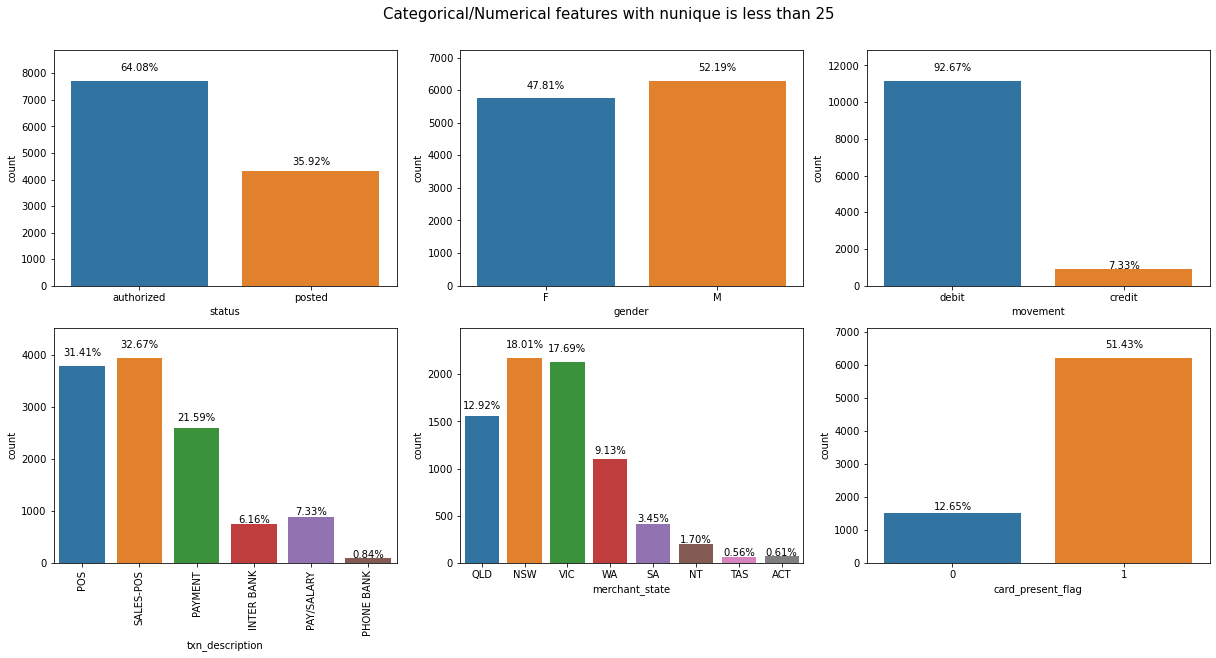

In [22]:
fig, axes = plt.subplots(2, 3, figsize = (17, 9))
fig.suptitle('Categorical/Numerical features with nunique is less than 25', y = 1.01, fontsize = 15)

ax_0 = sns.countplot(data = df, x = "status", ax = axes[0, 0])
ax_1 = sns.countplot(data = df, x = "gender", ax = axes[0,1])
ax_2 = sns.countplot(data = df, x = "movement", ax = axes[0,2])
ax_3 = sns.countplot(data = df, x = 'txn_description', ax = axes[1,0])
axes[1,0].set_xticklabels(df[s_cat_cols].txn_description.unique(), rotation = 90)
ax_4 = sns.countplot(data = mer_plot, x = mer_plot['merchant_state'], ax = axes[1,1])
ax_5 = sns.countplot(data = cpf_plot, x = 'card_present_flag', ax = axes[1,2])

plot_height_per(df, ax_0)
plot_height_per(df, ax_1)
plot_height_per(df, ax_2)
plot_height_per(df, ax_3)
plot_height_per(df, ax_4)
plot_height_per(df, ax_5)

plt.tight_layout()
plt.show()

### Movement

In movement, debit was used a lot more than credit, but credit had about threefold in amount.  

              amount  count
movement                   
credit    1676576.85    883
debit      586707.35  11160


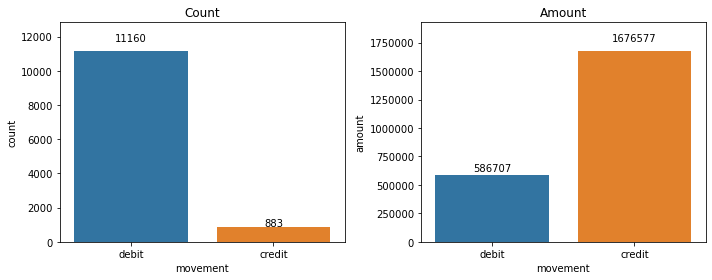

In [23]:
print(pd.DataFrame({'amount': round(df.groupby('movement')['amount'].sum(),2), 'count': df.groupby('movement')['amount'].count()}))
mv = pd.DataFrame({'amount': round(df.groupby('movement')['amount'].sum(),2), 'count': df.groupby('movement')['amount'].count()}).reset_index()
fig, ax = plt.subplots(1, 2, figsize = (10,4))

ax[0] = sns.countplot(data = df, x = 'movement', order = ['debit','credit'] , ax = ax[0])
ax[0].set_title('Count')

ax[1] = sns.barplot(data = mv, x = 'movement', y = 'amount', order = ['debit','credit'], ax = ax[1])
ax[1].set_title('Amount')
plt.ticklabel_format(style='plain', axis='y')

plot_height(df, ax[0])
plot_height(df, ax[1])

plt.tight_layout()
plt.show()

### Amount by gender and age group

It is clear that males spend more many than females except in the group '<20'.

PAY/SALARY, PAYMENT and POS are most common transactions across every age group.

It's quite interesting that men spend more moeny than women.

In [ ]:
df['age_group'] = pd.cut(df.age,[0,20,30,40,50,60,99999],labels=['<20','20-30','30-40','40-50','50-60','>60'])

age = df.groupby(['month_name','age_group', 'gender'])['amount'].sum().reset_index()
age['mean'] = df.groupby(['month_name','age_group', 'gender'])['amount'].mean().values
age['count'] = df.groupby(['month_name','age_group', 'gender'])['amount'].count().values

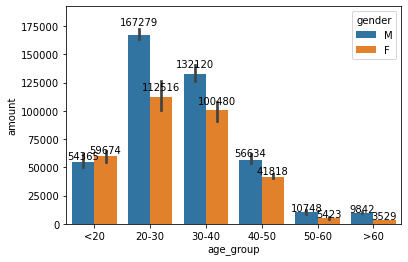

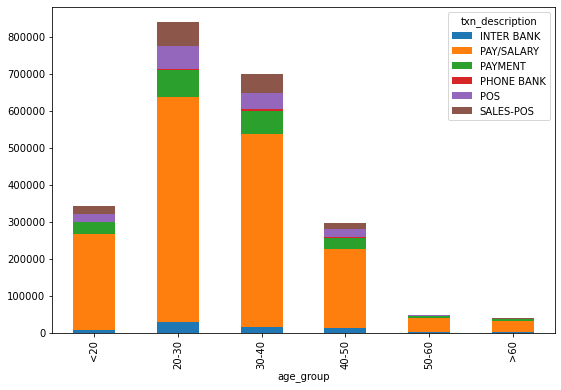

In [32]:
plot_height(age, sns.barplot(data = age, x = 'age_group', y = 'amount', hue = 'gender', hue_order = ['M', 'F']))

txn_stck = df.groupby(['age_group', 'txn_description'])['amount'].sum().unstack()#.fillna(0)
txn_stck.plot(kind = 'bar', stacked = True, figsize = (9,6))

plt.show()

### Transaction Description

Most of the trasaction were made by PAY/SALARY.

It is interesting that PAY/SALARY was done with only credit and the others were done with only debit.

In [ ]:
len(df[df.movement == 'credit'])
a = df[['txn_description', 'amount']][df.movement == 'credit'].reset_index()
a.amount.sum()

  txn_description movement      amount  count
0      INTER BANK    debit    64331.00    742
1      PAY/SALARY   credit  1676576.85    883
2         PAYMENT    debit   201794.00   2600
3      PHONE BANK    debit    10716.00    101
4             POS    debit   152861.24   3783
5       SALES-POS    debit   157005.11   3934


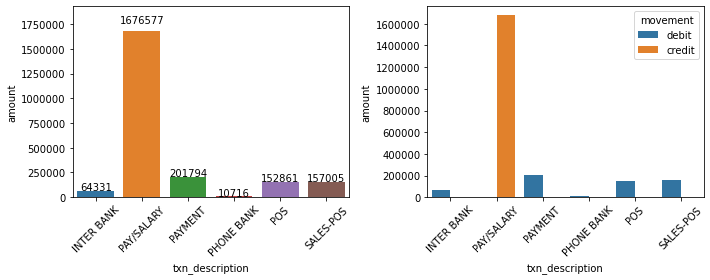

In [25]:
# sns.barplot(data = age, x = 'age_group', y = 'amount', hue = 'gender')
txn = df.groupby(['txn_description', 'movement'])['amount'].sum().reset_index()
txn['count'] = df.groupby('txn_description')['amount'].count().values
print(txn)

fig, ax = plt.subplots(1, 2, figsize = (10,4))

ax[0] = sns.barplot(data = txn, x = 'txn_description', y = 'amount', ax = ax[0])
ax[0].ticklabel_format(style = 'plain', axis = 'y')
ax[0].set_xticklabels(labels = txn['txn_description'],rotation = 45)

ax[1] = sns.barplot(data = txn, x = 'txn_description', y = 'amount', hue = 'movement', ax = ax[1])
ax[1].ticklabel_format(style = 'plain', axis = 'y')
ax[1].set_xticklabels(labels = txn['txn_description'], rotation = 45)

plot_height(txn, ax[0])
# plot_height(txn, ax[1])

plt.tight_layout()
plt.show()

### Age group and gender.

The major customer groups are people in 20's and 30's.  

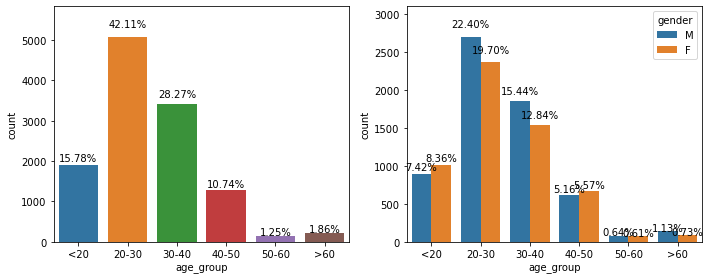

In [33]:
fig, axes = plt.subplots(1,2, figsize = (10, 4))

axes[0] = sns.countplot(data = df, x = 'age_group', ax = axes[0])
axes[1] = sns.countplot(data = df, x = 'age_group', hue = 'gender', hue_order = ['M','F'], ax = axes[1])

plot_height_per(df, axes[0])
plot_height_per(df, axes[1])

plt.tight_layout()
plt.show()

### The average of total transaction amount

In [27]:
df['amount'].mean()

187.93358797641767

### The total amount and average of each month

In [28]:
df['day_name'] = df['date'].dt.day_name()
df['month_name'] = df['date'].dt.month_name()

       Month      Total     Average
0     August  729935.52  185.121867
1    October  802798.47  196.427323
2  September  730550.21  182.045903


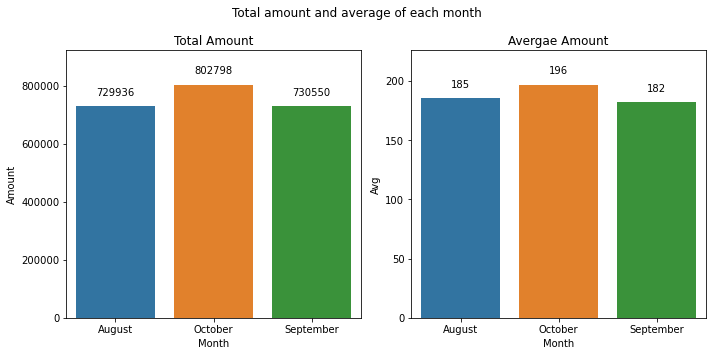

In [29]:
month_total = df.groupby('month_name')['amount'].sum().reset_index()
month_avg = df.groupby('month_name')['amount'].mean().reset_index()

print(pd.DataFrame({'Month' :month_total['month_name'], 'Total': month_total['amount'], 'Average':month_avg['amount']}))

fig, axes = plt.subplots(1,2, figsize = (10, 5))
# sns.axes_style("darkgrid")
fig.suptitle('Total amount and average of each month')

sns.barplot(ax = axes[0], data = month_total, x = 'month_name', y = 'amount')
axes[0].set_title('Total Amount')
axes[0].set(xlabel = 'Month', ylabel = 'Amount', ylim = (0, 900000))

sns.barplot(ax = axes[1], data = month_avg, x = 'month_name', y = 'amount')
axes[1].set_title('Avergae Amount')
axes[1].set(xlabel = 'Month', ylabel = 'Avg', ylim = (0, 300))

plot_height(month_total, axes[0])
plot_height(month_avg, axes[1])

plt.tight_layout()
plt.show()

### Spending in each month by gender

In [30]:
# Add age_group. The min and max values are 18 and 78 in age.
df['age_group'] = pd.cut(df.age,[0,20,30,40,50,60,99999],labels=['<20','20-30','30-40','40-50','50-60','>60'])

age = df.groupby(['month_name','age_group', 'gender'])['amount'].sum().reset_index()
age['mean'] = df.groupby(['month_name','age_group', 'gender'])['amount'].mean().values
age['count'] = df.groupby(['month_name','age_group', 'gender'])['amount'].count().values

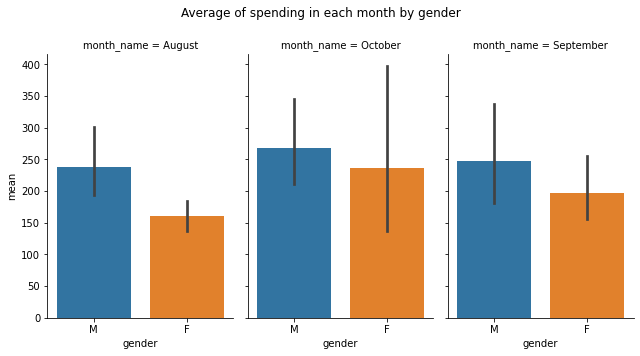

In [31]:
age = df.groupby(['month_name','age_group', 'gender'])['amount'].sum().reset_index()
age['mean'] = df.groupby(['month_name','age_group', 'gender'])['amount'].mean().values
age['count'] = df.groupby(['month_name','age_group', 'gender'])['amount'].count().values

g = sns.FacetGrid(age, col = 'month_name', hue='gender', hue_order = ['M','F'], margin_titles=True, height = 5, aspect=.6)
g.map(sns.barplot, "gender", "mean", order = ['M','F'])
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Average of spending in each month by gender')

plt.show()

### Transactions that customers make each month
Each customer makes about 40 transactions in every month

In [35]:
month_trans = df.groupby('month_name')['amount'].count().reset_index()
month_num_cust = df.groupby('month_name')['customer_id'].nunique().reset_index()
month_trans['mean'] = month_trans['amount'] / month_num_cust['customer_id']
month_trans.rename(columns = {'amount': 'count'}, inplace = True)

       Month  Total  Average
0     August   3943    39.43
1    October   4087    40.87
2  September   4013    40.13


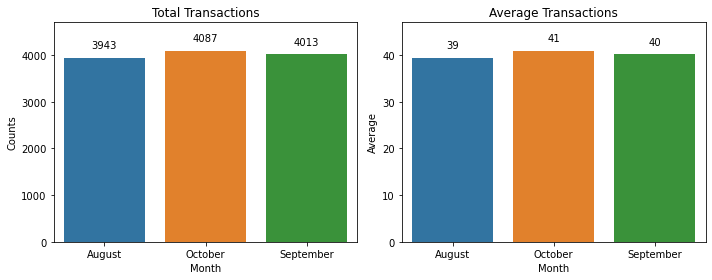

In [36]:
print(pd.DataFrame({'Month' :month_trans['month_name'], 'Total': month_trans['count'], 'Average':month_trans['mean']}))

fig, axes = plt.subplots(1,2, figsize = (10, 4))
# sns.axes_style("darkgrid")

sns.barplot(ax = axes[0], data = month_trans, x = 'month_name', y = 'count')
axes[0].set_title('Total Transactions')
axes[0].set(xlabel = 'Month', ylabel = 'Counts', ylim = (0, 4400))

sns.barplot(ax = axes[1], data = month_trans, x = 'month_name', y = 'mean')
axes[1].set_title('Average Transactions')
axes[1].set(xlabel = 'Month', ylabel = 'Average', ylim = (0, 50))
# sns.barplot(ax = axes[1], data = month_trans_avg, x = 'month_name', y = 'amount')
# axes[1].set_title('Avergae Amount')

plot_height(month_trans, axes[0])
plot_height(month_trans, axes[1])

plt.tight_layout()
plt.show()

## 4. Visualisation?

Segment the dataset by transaction date and time. 

Visualise transaction volume and spending over the course of an average day or week. 

Consider the effect of any outliers that may distort your analysis.

### 4-1. Segment the dataset by transaction date and time. ??? 

Does it mean extract date and time from exraction? I failed to understand it...

The 'date' column indicates transaction date. 

Do I still need to make another transaction date column?  

Let's just add transaction date and time.

In [37]:
# Add transaction_date and transaction_time
df['transaction_date'] = df['extraction'].astype(str).str[:10]   # 2018-08-01
df['transaction_time'] = df['extraction'].astype(str).str[11:19] # 23:34:25

df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,day_name,month_name,age_group,transaction_date,transaction_time
0,authorized,1,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,Wednesday,August,20-30,2018-08-01,01:01:15
1,authorized,0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,Wednesday,August,20-30,2018-08-01,01:13:45
2,authorized,1,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,Wednesday,August,30-40,2018-08-01,01:26:15
3,authorized,1,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,Wednesday,August,30-40,2018-08-01,01:38:45
4,authorized,1,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,Wednesday,August,20-30,2018-08-01,01:51:15


### 4-2. Visualise transaction volume and spending over the course of an average day or week.

amount is right skewed 

In [ ]:
# most frequent amounts in each
# more than 1000
# more than 3000 etc. 

In [ ]:
a = df['amount'].value_counts().reset_index()

In [ ]:
df['amount'].describe()

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


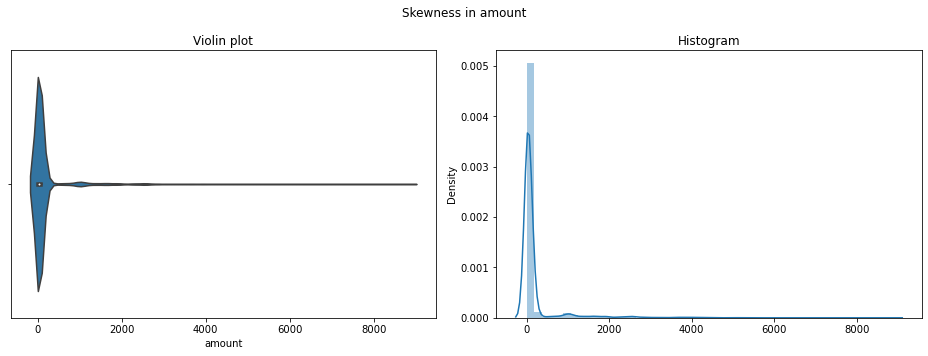

In [38]:
fig, axes = plt.subplots(1, 2, figsize = (13, 5))
fig.suptitle('Skewness in amount')

# Boxplot
sns.violinplot(ax = axes[0], x=df['amount'])
axes[0].set_title('Violin plot')

# Histogram
sns.distplot(x = df['amount'])
# sns.histplot(ax = axes[1], x = 'amount', bins = 10, data = df)
axes[1].set_title('Histogram')

plt.tight_layout()
plt.show()

In [ ]:
# cumulate

#        count transaction
# cust_1
# cust_2
# cust_3


In [40]:
df['month_name'] = df['date'].dt.month_name()
df['date_name'] = df['date'].dt.day_name()

### Transaction amount and volumn by days

* **Mon** - buy things expensive?

* **Fri** - the largest amount and volume because it is Friday. 

* **Sat, Sun** - high volumn, but not a large amount for its volumn.

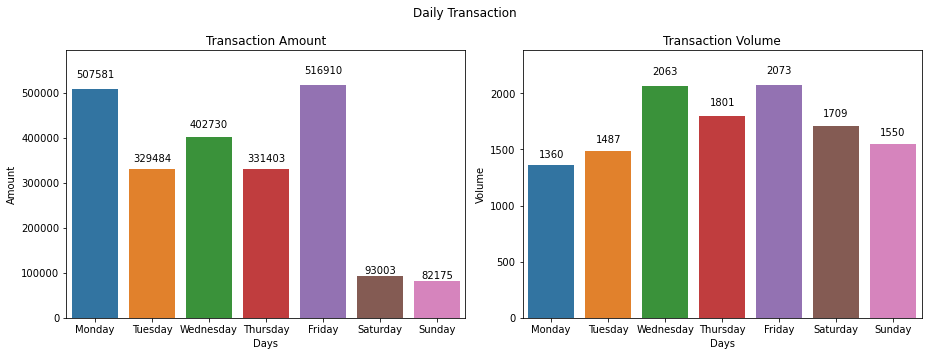

In [41]:
daily_spending = df.groupby('date_name')['amount'].sum().sort_values(ascending = False).reset_index()
daily_trans_vol = df.groupby('date_name')['amount'].count().sort_values(ascending = False).reset_index()

fig, axes = plt.subplots(1,2, figsize = (13,5))
fig.suptitle('Daily Transaction')

sns.barplot(ax = axes[0], data = daily_spending, x = 'date_name', y = 'amount', order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] )
axes[0].set_title('Transaction Amount')
axes[0].set(xlabel = 'Days', ylabel = 'Amount')

sns.barplot(ax = axes[1], data = daily_trans_vol, x = 'date_name', y = 'amount', order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
axes[1].set_title('Transaction Volume')
axes[1].set(xlabel = 'Days', ylabel = 'Volume')

plot_height(daily_spending, axes[0])
plot_height(daily_trans_vol, axes[1])

plt.tight_layout()
plt.show()

### Transaction amount and volumn by weekly basis.

In [42]:
# Separate transaction_date by weekly basis
weekly_trans_amount = df.groupby([pd.Grouper(key='date', freq='W-MON')])['amount'].sum().reset_index().sort_values('date')
weekly_trans_volume = df.groupby([pd.Grouper(key='date', freq='W-MON')])['amount'].count().reset_index().sort_values('date')

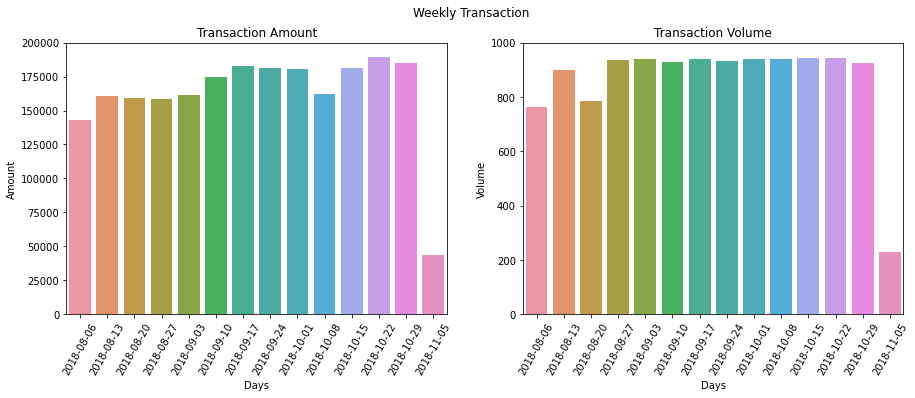

In [43]:
fig, axes = plt.subplots(1,2, figsize = (15,5))
fig.suptitle('Weekly Transaction')

# Transaction amount
sns.barplot(ax = axes[0], data = weekly_trans_amount, x = 'date', y = 'amount' )
axes[0].set_title('Transaction Amount')
axes[0].set(xlabel = 'Days', ylabel = 'Amount', ylim = (0, 200000))
axes[0].set_xticklabels(weekly_trans_amount['date'].astype(str), rotation = 60)

# Transaction volume
sns.barplot(ax = axes[1], data = weekly_trans_volume, x = 'date', y = 'amount')
axes[1].set_title('Transaction Volume')
axes[1].set(xlabel = 'Days',ylabel = 'Volume', ylim = (0, 1000))
axes[1].set_xticklabels(weekly_trans_volume['date'].astype(str), rotation = 60)
plt.show()

### Location (Suburb and state)

location information provided in the dataset?

In [44]:
# df.merchant_state.nunique()
df.merchant_suburb.nunique()

1609

In [45]:
df.groupby('merchant_state')['amount'].sum()

merchant_state
ACT      4876.68
NSW    102021.77
NT       9168.89
QLD     53483.45
SA      16776.57
TAS      1962.93
VIC     87584.00
WA      33992.06
Name: amount, dtype: float64

In [46]:
mer_loc = df.groupby(['merchant_state'])['merchant_suburb'].nunique().reset_index()
mer_loc['amount'] = df.groupby('merchant_state')['amount'].sum().values
mer_loc.sort_values('merchant_suburb', ascending = False, inplace = True)

The number of distinct merchants in each state.

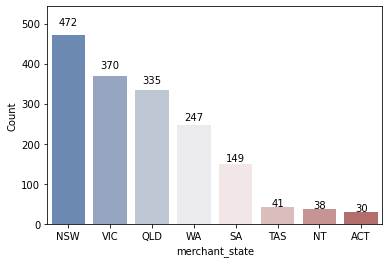

In [47]:
g = sns.barplot(data = mer_loc, x = 'merchant_state', y = 'merchant_suburb', palette="vlag")
g.set_ylabel('Count')
plot_height(mer_loc, g)
plt.show()

The amount that the merchants generated in each state

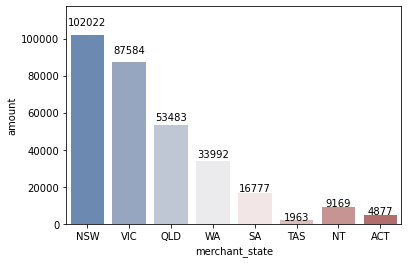

In [48]:
g = sns.barplot(data = mer_loc, x = 'merchant_state', y = 'amount', palette = 'vlag')
plot_height(mer_loc, g)
plt.show()

Number 2 is the sum of amount from rows where merchant_state and merchant_suburb are null. 

1. 309866.35000000015
2. 1953417.85
3. 2263284.2

1 + 2 = 3

In [49]:
# 1. amount with currently available values
print(mer_loc['amount'].sum())
# 2. amount with missing values
print(df['amount'][df['merchant_state'].isnull() | df['merchant_suburb'].isnull()].sum())
# 3. total amount
print(df['amount'].sum())

309866.35000000015
1953417.85
2263284.2


In [50]:
1953417.85 + 309866.35000000015

2263284.2


https://www.youtube.com/watch?v=fX237OP1UAs

https://www.kaggle.com/abhat222/anz-data-anz-program

https://www.kaggle.com/ashikshafi/anztransaction

In [ ]:
years = list(set(df['date'].astype('str').str[:4]))
months = list(set(df['date'].astype('str').str[5:7]))
months.sort()
print(years, months)

In [ ]:
for y in range(len(years)):
    print('Year \t Month \t Amount \t Average')
    for m in range(len(months)):
        end_month = int(months[m])
        if end_month+1 == 13:
            months[m] = '1'
        else: 
            end_month += 1
            
        start_date = years[y] + '-' + months[m] + '-01'
        end_date = years[y] + '-' + str(end_month) + '-01'
        
        month_sum = round(df['amount'].loc[(df['date'] >= start_date) & (df['date'] < end_date)].sum(), 2)
        month_avg = round(df['amount'].loc[(df['date'] >= start_date) & (df['date'] < end_date)].mean(), 2)
        
        print(f'{years[y]} \t {months[m]} \t {month_sum} \t {month_avg}')

In [ ]:
# Number of transactions each month on average
for y in range(len(years)):
    print('Year \t Month \t Total_transactions \t Avg_transactions')
    for m in range(len(months)):
        end_month = int(months[m])
        if end_month+1 == 13:
            months[m] = '1'
        else: 
            end_month += 1
            
        start_date = years[y] + '-' + months[m] + '-01'
        end_date = years[y] + '-' + str(end_month) + '-01'
        
        # dtype = np.int32
        month_total_trans = df['transaction_id'].loc[(df['date'] >= start_date) & (df['date'] < end_date)].count()
        month_unique_cust = df['customer_id'].loc[(df['date'] >= start_date) & (df['date'] < end_date)].nunique()
        month_avg_trans = month_total_trans/month_unique_cust
        
        print(f'{years[y]} \t {months[m]} \t {month_total_trans} \t\t\t {month_avg_trans}')

In [ ]:
# 91 dates 
day_sum = pd.DataFrame(df.groupby('date')['amount'].sum().reset_index())
day_avg = pd.DataFrame(df.groupby('date')['amount'].mean().reset_index())
day_trans = pd.DataFrame(df.groupby('date')['amount'].count().reset_index())
# day_cust = pd.DataFrame(df.groupby('date', dropna = False)['customer_id'].nunique())

pd.DataFrame({'date': day_sum['date'], 'amount_sum': day_sum['amount'], 'amount_avg': day_avg['amount'], 'trans_volume': day_trans['amount']}).set_index('date')


In [ ]:
# Transaction volume
plt.bar(weekly_trans_volume['transaction_date'], weekly_trans_volume['amount'], width = 5)
plt.xlabel('Date (Weekly)')
x_tics = weekly_trans_volume['transaction_date']
plt.xticks(x_tics, weekly_trans_volume['transaction_date'].astype(str), rotation = 'vertical')
plt.ylabel('Volume')
plt.ylim(0, 1000)
plt.title('Transaction volume over weeks')
plt.show

In [ ]:
# Transaction amount
weekly_trans_amount = df.groupby([pd.Grouper(key='transaction_date', freq='W-MON')])['amount'].sum().reset_index().sort_values('transaction_date')

In [ ]:
weekly_trans_amount

In [ ]:
plt.bar(weekly_trans_amount['transaction_date'], weekly_trans_amount['amount'], width = 5)
plt.xlabel('Date (Weekly)')
x_tics = weekly_trans_amount['transaction_date']
plt.xticks(x_tics, weekly_trans_amount['transaction_date'].astype(str), rotation = 'vertical')
plt.ylabel('Amount')
plt.ylim(0, 200000)
plt.title('Transaction amount over weeks')
plt.show

In [ ]:
# Transaction volumn
df.groupby('date')['transaction_id'].count().hist()
plt.show()

In [ ]:
months = ['10', '11', '12', '1', '2', '12', '3', '5']

In [ ]:
for y in range(len(years)):
    print('Year \t Month \t Amount \t Average')
    for m in range(len(months)):
        test = int(months[m])
        if test+1 == 13:
            months[m] = '1'
        else: 
            test += 1
#         print(months[m], test)
        start_date = years[y] + '-' + months[m] + '-01'
        end_date = years[y] + '-' + str(test) + '-01'
#         print(years[y] + '-' + test + '-01')
#         print(start_date + ' ' + end_date)
#         print(df['amount'].loc[(df['date'] > start_date) & (df['date'] < end_date)].sum())
        month_sum = round(df['amount'].loc[(df['date'] > start_date) & (df['date'] < end_date)].sum(), 2)
        month_avg = round(df['amount'].loc[(df['date'] > start_date) & (df['date'] < end_date)].mean(), 2)
#         month_sum = round(df['amount'].loc[df['date'] <= years[y] + '-' + months[m] + '-01' ].to_numpy().sum(), 2)
#         month_avg = round(df['amount'].loc[df['date'] <= years[y] + '-' + months[m] + '-01' ].to_numpy().mean(), 2)
        print(f'{years[y]} \t {months[m]} \t {month_sum} \t {month_avg}')

In [ ]:
df['amount'].mean()

In [ ]:
# df['date'].loc[df['date'] == '2018-09']
# df.groupby('date')['amount'].sum() 
for y in range(len(years)):
    print('Year \t Month \t Total_transactions \t Avg_transactions')
    for m in range(len(months)):
        end_month = int(months[m])
        if end_month+1 == 13:
            months[m] = '1'
        else: 
            end_month += 1
            
        start_date = years[y] + '-' + months[m] + '-01'
        end_date = years[y] + '-' + str(end_month) + '-01'
        
        # dtype = np.int32
        month_total_trans = df['transaction_id'].loc[(df['date'] >= start_date) & (df['date'] < end_date)].count()
        month_unique_cust = df['customer_id'].loc[(df['date'] >= start_date) & (df['date'] < end_date)].nunique()
#         print(month_total_trans/month_unique_cust)
#         print(month_unique_cust/month_total_trans)
#         print(type(month_total_trans))
#         print(type(int(month_total_trans)))
        month_avg_trans = month_total_trans/month_unique_cust
        print(f'{years[y]} \t {months[m]} \t {month_total_trans} \t\t\t {month_avg_trans}')

In [ ]:
# len(df['transaction_id'].loc[(df['date'] >= start_date) & (df['date'] < end_date)])
df['customer_id'].loc[(df['date'] >= start_date) & (df['date'] < end_date)].nunique()

In [ ]:
pd.date_range(start = '2018-03-01', end = '2018-04-01', closed = 'left')

#a in df['date'].astype('str')